In [2]:
import os
import json
from matplotlib import pyplot as plt
import pandas as pd

In [6]:
dfs = []
for res_dir in [
        # 'results/SAENcoder/gpt2.blocks.10.hook_resid_pre.default',
        'results/SAENcoder/gpt2.blocks.10.hook_resid_pre.no-error',

        # 'results/SAENcoder/google/gemma-2b-it.blocks.12.hook_resid_post.default',
        'results/SAENcoder/google/gemma-2b-it.blocks.12.hook_resid_post.no-error',
    ]:
        all_results = os.listdir(res_dir)

        all_scores = []
        all_durations = []
        names = []
        for res in all_results:
            if res.endswith('.json') and res != 'model_meta.json' and 'Classification' in res:
                with open(os.path.join(res_dir, res), 'r') as f:
                    data = json.load(f)
                all_scores.append(data['scores']['test'][0]['main_score'])
                names.append(data['task_name'])
                all_durations.append(data['evaluation_time'])

        normalized_durations = [d / max(all_durations) for d in all_durations]
        df = pd.DataFrame({'task': names, 'score': all_scores, 'duration': normalized_durations, 'abs_duration': all_durations})
        dfs.append(df)



In [7]:
dfs[0]['task']

0         AmazonCounterfactualClassification
1                AmazonReviewsClassification
2                    Banking77Classification
3                      EmotionClassification
4                         ImdbClassification
5                MassiveIntentClassification
6              MassiveScenarioClassification
7                   MTOPDomainClassification
8                   MTOPIntentClassification
9           ToxicConversationsClassification
10    TweetSentimentExtractionClassification
Name: task, dtype: object

In [10]:
print(dfs[0]['score'].mean())
print(dfs[1]['score'].mean())


0.5672727605112003
0.6342704397546598


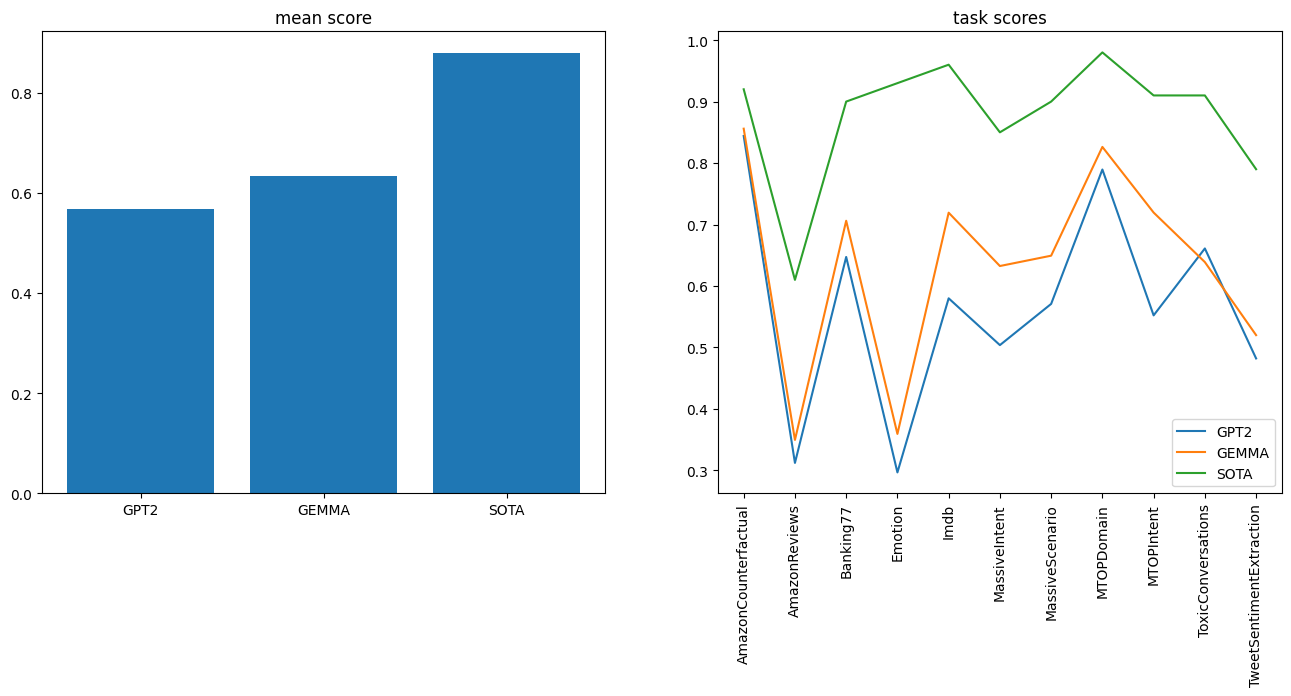

In [34]:

conditions = ['GPT2', 'GEMMA', 'SOTA']
sota = [0.92, 0.61, 0.9, 0.93, 0.96, 0.85, 0.9, 0.98, 0.91, 0.91, 0.79]
names = [x.replace('Classification', '') for x in list(dfs[0]['task'].values)]

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
plt.xticks(rotation=90) 

ax[1].plot(names, dfs[0]['score'])
ax[1].plot(names, dfs[1]['score'])
ax[1].plot(names, sota)
ax[1].set_title('task scores')



# rotate x axis lables
ax[1].legend(conditions)


ax[0].bar(conditions, [dfs[0]['score'].mean(), dfs[1]['score'].mean(), sum(sota) / len(sota)])
ax[0].set_title('mean score')
plt.show()

In [22]:
df

,task,score,duration,abs_duration
0,AmazonCounterfactualClassification,0.801724,0.080827,116.564568
1,AmazonReviewsClassification,0.338520,0.146958,211.933549
2,Banking77Classification,0.565584,0.126898,183.004119
3,EmotionClassification,0.321950,0.079080,114.044843
4,ImdbClassification,0.680696,0.333891,481.517707
5,MassiveIntentClassification,0.468460,0.203446,293.397157
6,MassiveScenarioClassification,0.569805,0.110380,159.183158
7,MTOPDomainClassification,0.768650,0.111469,160.753921
8,MTOPIntentClassification,0.511560,0.322282,464.776371
9,ToxicConversationsClassification,0.630420,0.033249,47.950231


In [23]:
df

,task,score,duration,abs_duration
0,AmazonCounterfactualClassification,0.801724,0.080827,116.564568
1,AmazonReviewsClassification,0.338520,0.146958,211.933549
2,Banking77Classification,0.565584,0.126898,183.004119
3,EmotionClassification,0.321950,0.079080,114.044843
4,ImdbClassification,0.680696,0.333891,481.517707
5,MassiveIntentClassification,0.468460,0.203446,293.397157
6,MassiveScenarioClassification,0.569805,0.110380,159.183158
7,MTOPDomainClassification,0.768650,0.111469,160.753921
8,MTOPIntentClassification,0.511560,0.322282,464.776371
9,ToxicConversationsClassification,0.630420,0.033249,47.950231


In [18]:
df['abs_duration'].sum() / 60

38.6464565038681

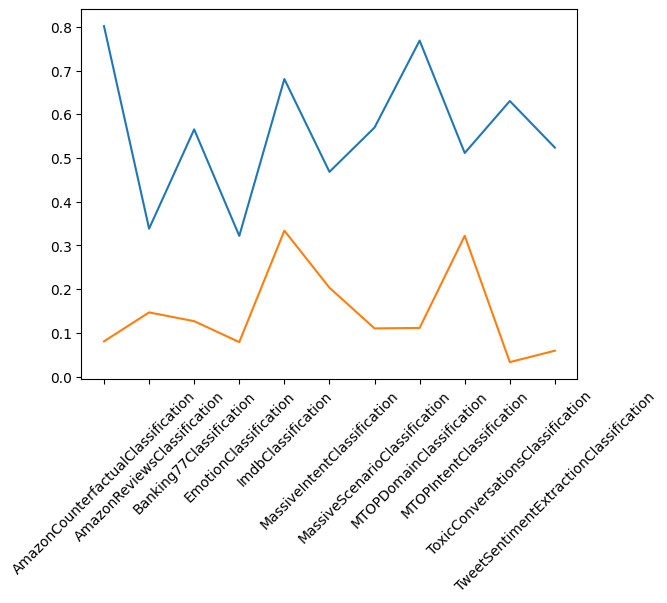

In [19]:

plt.plot(df['task'], df['score'])
plt.plot(df['task'], df['duration'])

# rotate x axis lables
plt.xticks(rotation=45) 
plt.show()


In [18]:
tasks = mteb.get_tasks(languages=["eng"], task_types=['Clustering'])
print(len(tasks))


NameError: name 'mteb' is not defined

In [27]:
TASK_LIST = [
    "AmazonCounterfactualClassification",
    # "AmazonPolarityClassification",
    "AmazonReviewsClassification",
    "Banking77Classification",
    "EmotionClassification",
    "ImdbClassification",
    "MassiveIntentClassification",
    "MassiveScenarioClassification",
    "MTOPDomainClassification",
    "MTOPIntentClassification",
    "ToxicConversationsClassification",
    "TweetSentimentExtractionClassification",

    # "ArxivClusteringP2P",
    # "ArxivClusteringS2S",
    "BiorxivClusteringP2P",
    "BiorxivClusteringS2S",
    "MedrxivClusteringP2P",
    "MedrxivClusteringS2S",
    # "RedditClustering",
    # "RedditClusteringP2P",
    # "StackExchangeClustering",
    "StackExchangeClusteringP2P",
    "TwentyNewsgroupsClustering",


]
tasks = mteb.get_tasks(languages=["eng"], tasks=TASK_LIST)

In [28]:


total_test = 0
for t in tasks:
    if t.metadata.n_samples is not None:
        for k, v in t.metadata.n_samples.items():
            print(t, t.metadata.n_samples[k])
            total_test += t.metadata.n_samples[k]

print(len(tasks), f"{total_test:,}")

AmazonCounterfactualClassification(name='AmazonCounterfactualClassification', languages=['eng']) 335
AmazonCounterfactualClassification(name='AmazonCounterfactualClassification', languages=['eng']) 670
AmazonReviewsClassification(name='AmazonReviewsClassification', languages=['eng']) 30000
AmazonReviewsClassification(name='AmazonReviewsClassification', languages=['eng']) 30000
Banking77Classification(name='Banking77Classification', languages=['eng']) 3080
EmotionClassification(name='EmotionClassification', languages=['eng']) 2000
EmotionClassification(name='EmotionClassification', languages=['eng']) 2000
ImdbClassification(name='ImdbClassification', languages=['eng']) 25000
MassiveIntentClassification(name='MassiveIntentClassification', languages=['eng']) 2033
MassiveIntentClassification(name='MassiveIntentClassification', languages=['eng']) 2974
MassiveScenarioClassification(name='MassiveScenarioClassification', languages=['eng']) 2033
MassiveScenarioClassification(name='MassiveScenar

In [19]:
tasks = mteb.get_tasks(languages=["eng"], task_types=['Classification', 'Clustering', 'PairClassification', 'Reranking', 'Retrieval', 'STS', 'Summarization'])
print(len(tasks))

260


In [20]:
import torch